In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
kidney = pd.read_csv('chronic_kidney_disease_preprocessed.csv')

In [ ]:
kidney = kidney.drop('id', axis=1)

In [ ]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
392,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
393,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
394,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
# Separate the features and target variable
X = kidney.drop('class', axis=1)
y = kidney['class']

In [ ]:
# Apply Correlation-based Feature Selection (CFS)
cfs_selector = SelectKBest(score_func=f_classif, k=17)
X_selected = cfs_selector.fit_transform(X, y)

In [ ]:
# Get the selected feature names
selected_features = X.columns[cfs_selector.get_support()]

In [ ]:
# Print the selected feature names
for feature in selected_features:
    print(feature)

bp
sg
al
rbc
pc
bgr
bu
sc
sod
hemo
pcv
rbcc
htn
dm
appet
pe
ane


In [ ]:
# Subset the data with the selected features
kidney_selected = kidney[selected_features]

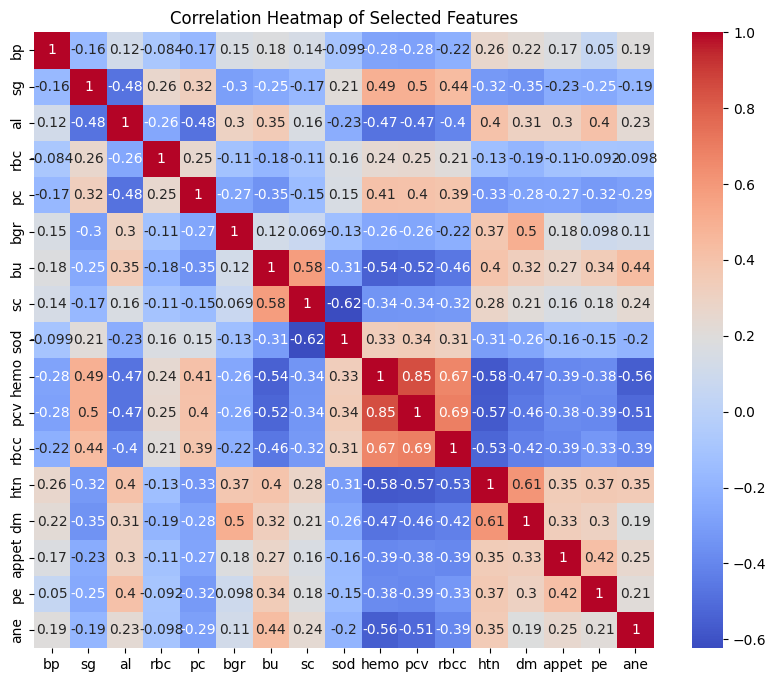

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlations between the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(kidney_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


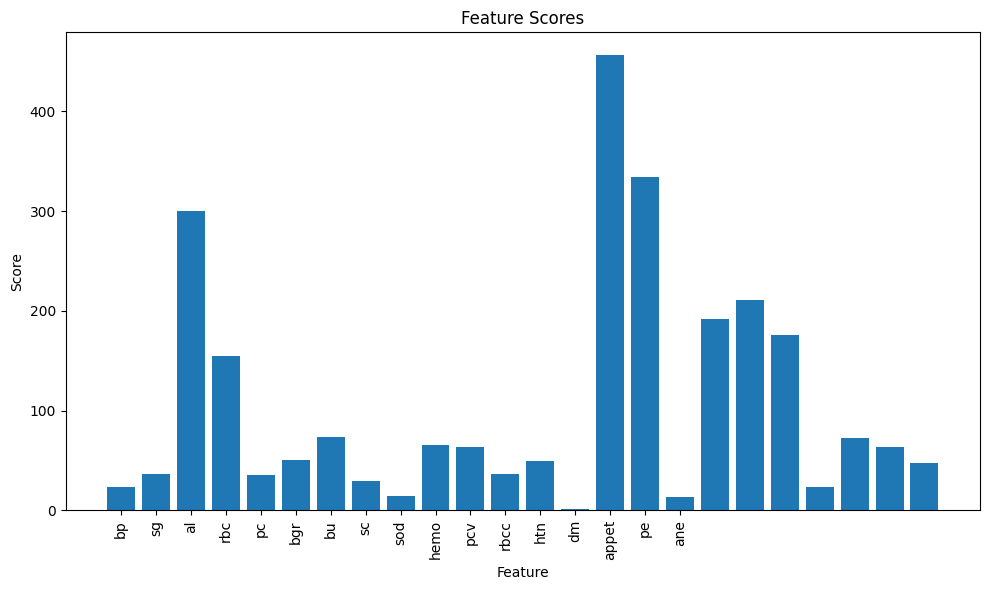

In [ ]:
import matplotlib.pyplot as plt

# Get the scores from the feature selection
scores = cfs_selector.scores_

# Create a bar plot of the scores for the selected features
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.xticks(range(len(selected_features)), selected_features, rotation='vertical')
plt.tight_layout()
plt.show()


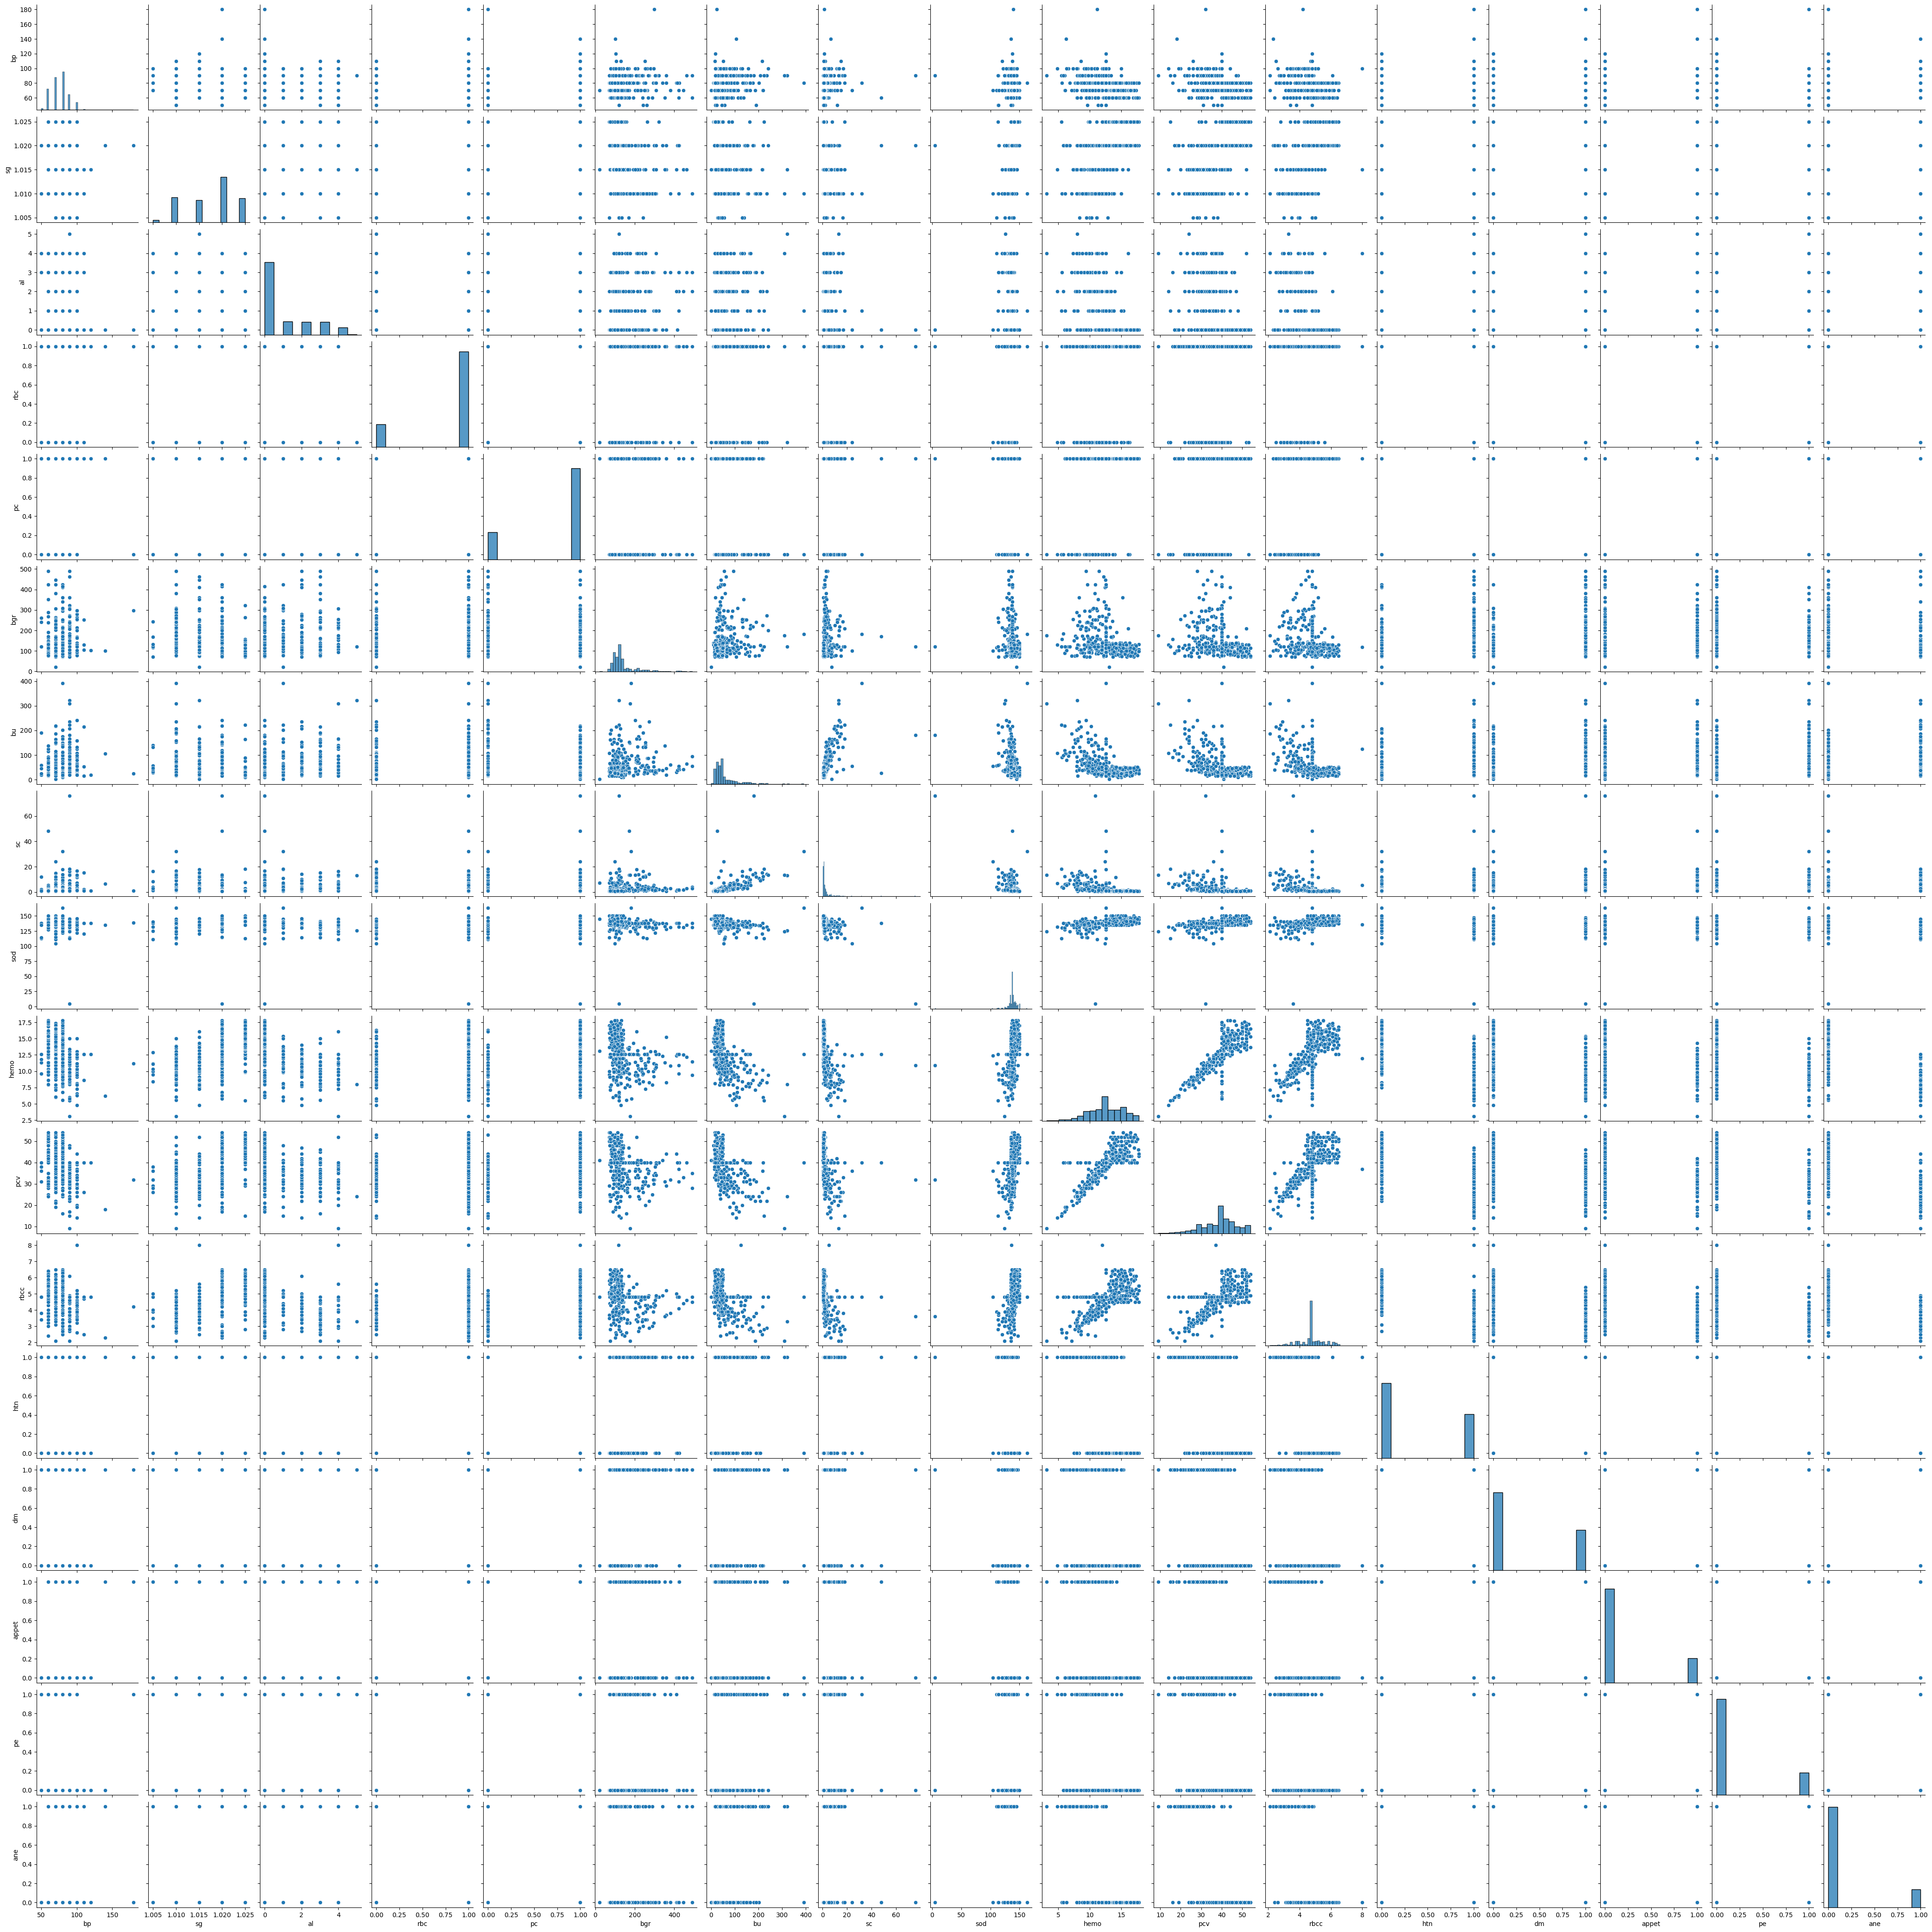

In [ ]:
import seaborn as sns
sns.pairplot(kidney_selected)
plt.show()

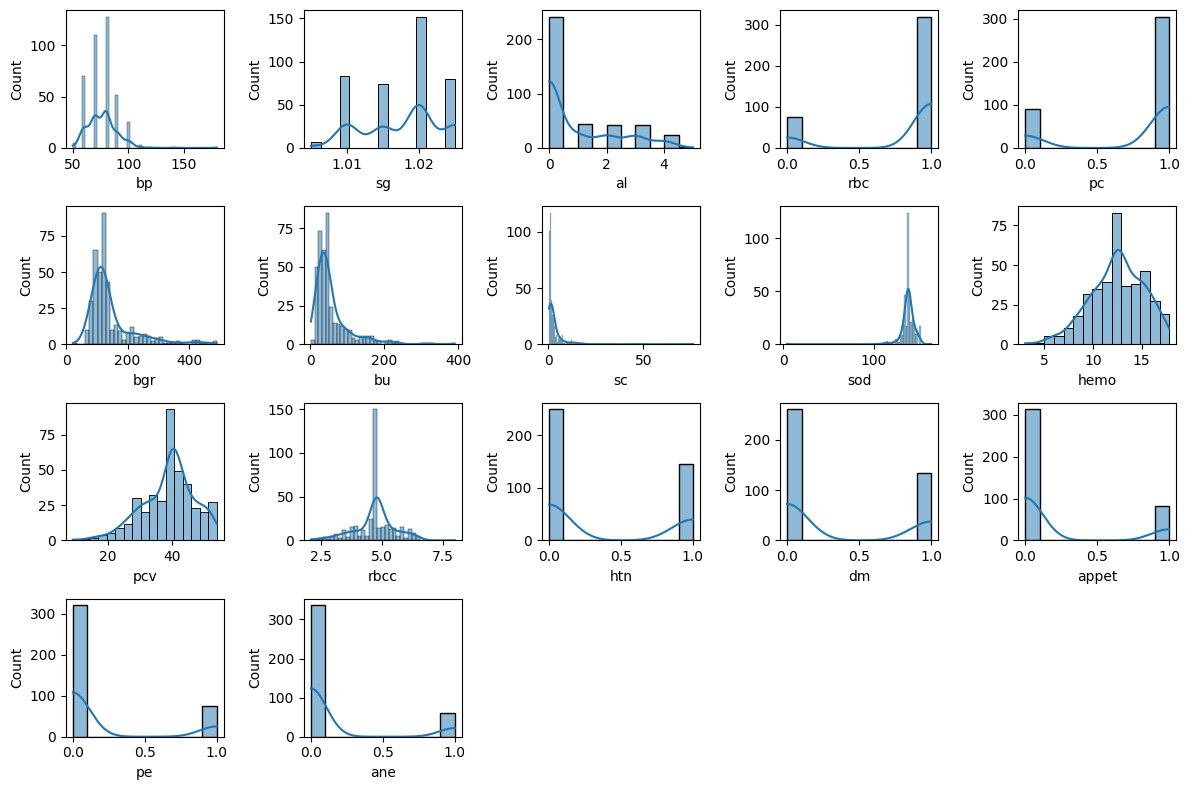

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 5, i+1)
    sns.histplot(data=kidney_selected, x=feature, kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


<ipython-input-18-6173d6e826f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_selected['class'] = kidney['class']


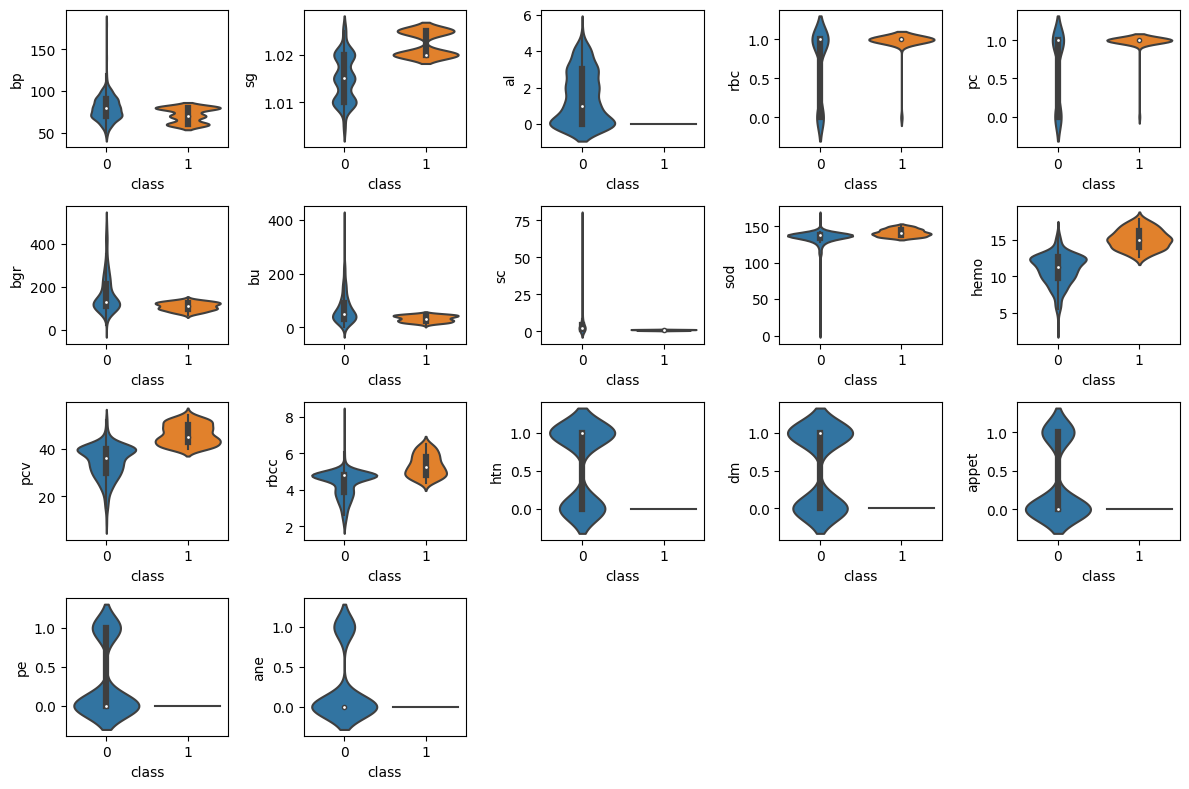

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target variable 'class' to the selected features DataFrame
kidney_selected['class'] = kidney['class']

# Create violin plots for each selected feature, grouped by the target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 5, i+1)
    sns.violinplot(data=kidney_selected, x='class', y=feature)
    plt.xlabel('class')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()



<ipython-input-19-68a51082ae2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney_selected['class'] = kidney['class']


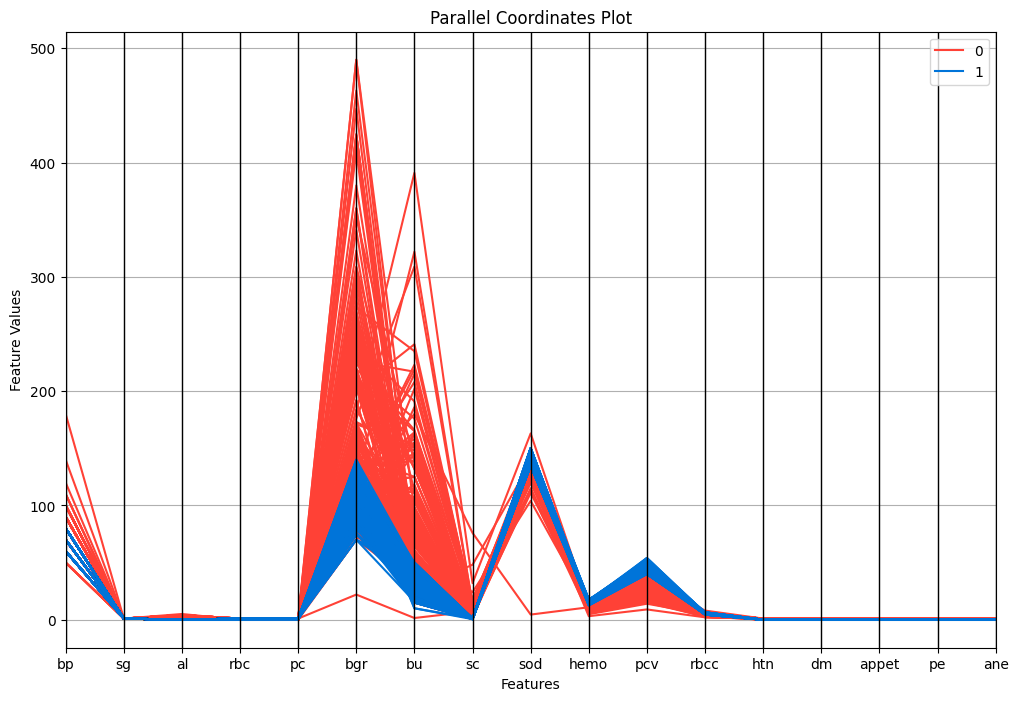

In [ ]:
from pandas.plotting import parallel_coordinates

# Add the target variable 'class' to the selected features DataFrame
kidney_selected['class'] = kidney['class']

# Create a parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(kidney_selected, 'class', color=('#FF4136', '#0074D9'))
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.legend(loc='upper right')
plt.show()


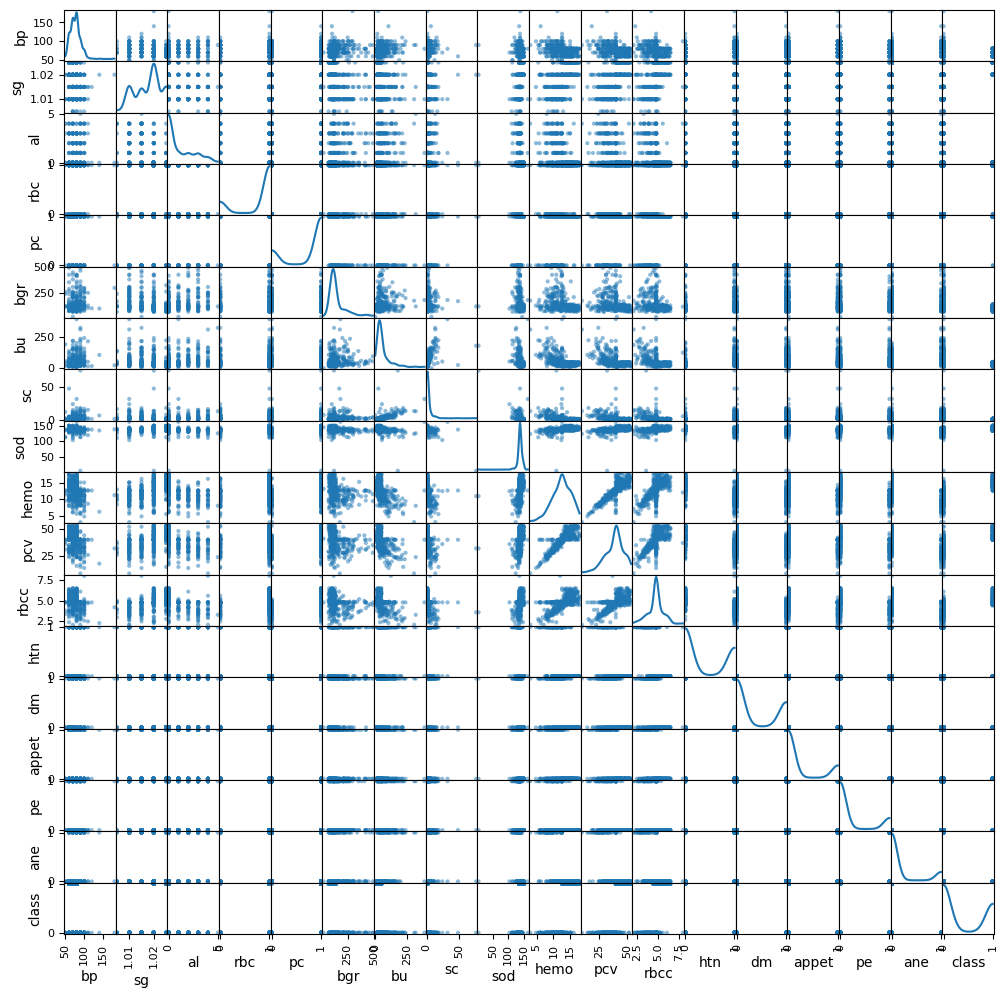

In [ ]:
pd.plotting.scatter_matrix(kidney_selected, figsize=(12, 12), diagonal='kde')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Split the selected features and target variable into train and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Define the parameter grids for each classifier
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Perform parameter tuning and evaluation for Naive Bayes (NB)
nb_classifier = GaussianNB()
nb_grid_search = GridSearchCV(nb_classifier, nb_param_grid, cv=5)
nb_grid_search.fit(X_train_selected, y_train)
nb_best_params = nb_grid_search.best_params_
nb_pred = nb_grid_search.predict(X_test_selected)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

In [ ]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1 Score:", nb_f1)
print("Naive Bayes Best Parameters:", nb_best_params)

Naive Bayes Accuracy: 0.9875
Naive Bayes Precision: 0.9642857142857143
Naive Bayes Recall: 1.0
Naive Bayes F1 Score: 0.9818181818181818
Naive Bayes Best Parameters: {'var_smoothing': 1e-07}


In [ ]:
# Perform parameter tuning and evaluation for k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(X_train_selected, y_train)
knn_best_params = knn_grid_search.best_params_
knn_pred = knn_grid_search.predict(X_test_selected)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

In [ ]:
print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print("k-Nearest Neighbors Precision:", knn_precision)
print("k-Nearest Neighbors Recall:", knn_recall)
print("k-Nearest Neighbors F1 Score:", knn_f1)
print("k-Nearest Neighbors Best Parameters:", knn_best_params)

k-Nearest Neighbors Accuracy: 0.9375
k-Nearest Neighbors Precision: 0.8666666666666667
k-Nearest Neighbors Recall: 0.9629629629629629
k-Nearest Neighbors F1 Score: 0.912280701754386
k-Nearest Neighbors Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
# Perform parameter tuning and evaluation for Support Vector Machines (SVM)
svm_classifier = SVC()
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_selected, y_train)
svm_best_params = svm_grid_search.best_params_
svm_pred = svm_grid_search.predict(X_test_selected)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [ ]:
print("Support Vector Machines Accuracy:", svm_accuracy)
print("Support Vector Machines Precision:", svm_precision)
print("Support Vector Machines Recall:", svm_recall)
print("Support Vector Machines F1 Score:", svm_f1)
print("Support Vector Machines Best Parameters:", svm_best_params)

Support Vector Machines Accuracy: 0.975
Support Vector Machines Precision: 0.9629629629629629
Support Vector Machines Recall: 0.9629629629629629
Support Vector Machines F1 Score: 0.9629629629629629
Support Vector Machines Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

In [ ]:
nb_cm

array([[52,  1],
       [ 0, 27]])

In [ ]:
knn_cm

array([[49,  4],
       [ 1, 26]])

In [ ]:
svm_cm

array([[52,  1],
       [ 1, 26]])

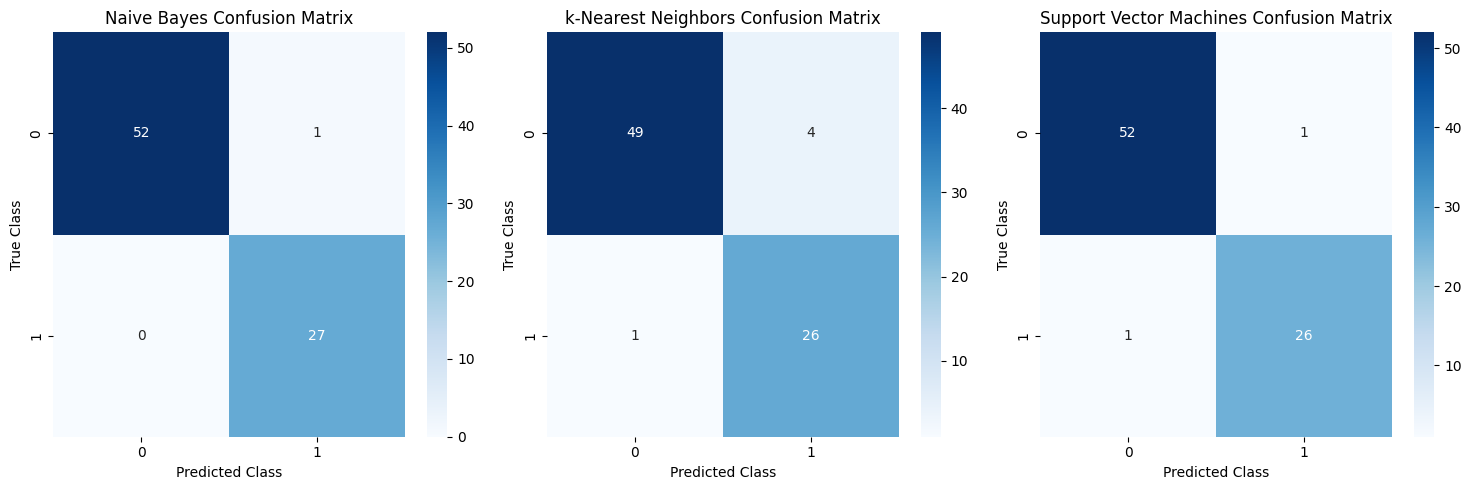

In [ ]:
# Create a figure with subplots for each classifier
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Confusion Matrix - Naive Bayes
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Naive Bayes Confusion Matrix")
axes[0].set_xlabel("Predicted Class")
axes[0].set_ylabel("True Class")

# Confusion Matrix - k-Nearest Neighbors
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("k-Nearest Neighbors Confusion Matrix")
axes[1].set_xlabel("Predicted Class")
axes[1].set_ylabel("True Class")

# Confusion Matrix - Support Vector Machines
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Support Vector Machines Confusion Matrix")
axes[2].set_xlabel("Predicted Class")
axes[2].set_ylabel("True Class")

plt.tight_layout()
plt.show()

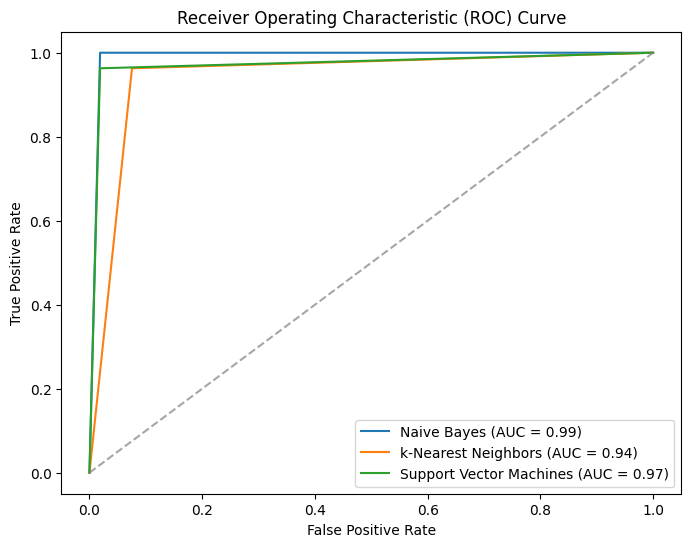

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred)
nb_auc = auc(nb_fpr, nb_tpr)

# Compute ROC curve and AUC for k-Nearest Neighbors
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)
knn_auc = auc(knn_fpr, knn_tpr)

# Compute ROC curve and AUC for Support Vector Machines
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='k-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machines (AUC = {:.2f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


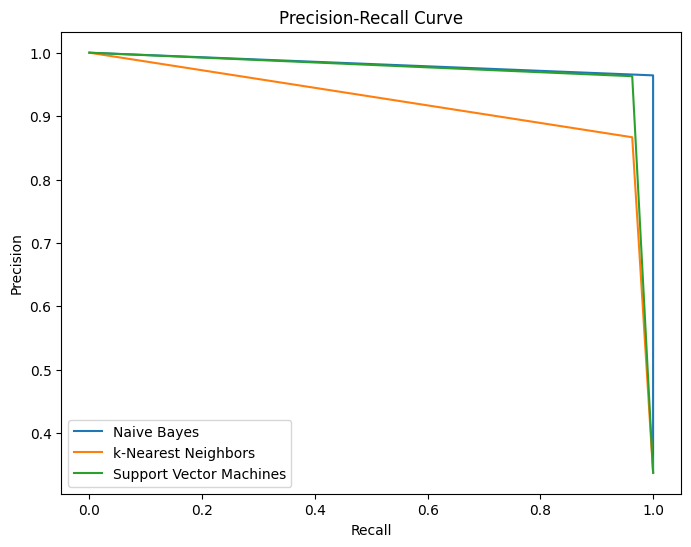

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall for Naive Bayes
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_pred)

# Compute precision and recall for k-Nearest Neighbors
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_pred)

# Compute precision and recall for Support Vector Machines
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_pred)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(nb_recall, nb_precision, label='Naive Bayes')
plt.plot(knn_recall, knn_precision, label='k-Nearest Neighbors')
plt.plot(svm_recall, svm_precision, label='Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Classification Report for Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes Classification Report:")
print(nb_report)

# Classification Report for k-Nearest Neighbors
knn_report = classification_report(y_test, knn_pred)
print("k-Nearest Neighbors Classification Report:")
print(knn_report)

# Classification Report for Support Vector Machines
svm_report = classification_report(y_test, svm_pred)
print("Support Vector Machines Classification Report:")
print(svm_report)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        27

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.87      0.96      0.91        27

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

Support Vector Machines Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.96      0.96      0.96        27

    accuracy                           0.97        80
   

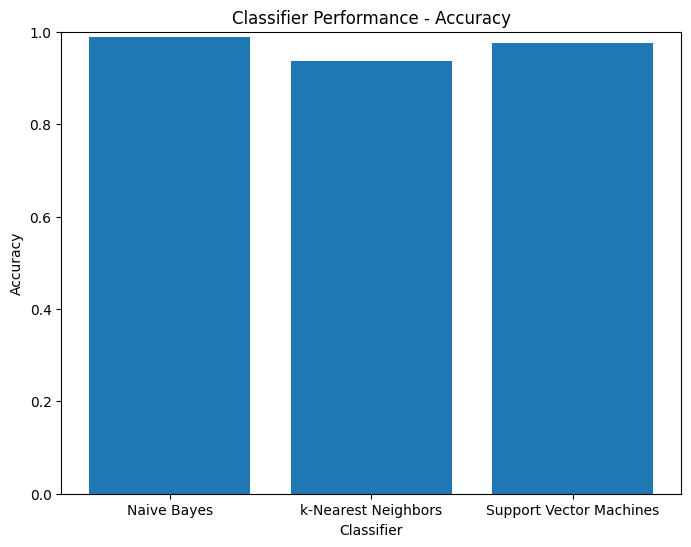

In [ ]:
import matplotlib.pyplot as plt

# Define the evaluation parameter scores
accuracy_scores = [nb_accuracy, knn_accuracy, svm_accuracy]

# Define the names of the classifiers
classifiers = ['Naive Bayes', 'k-Nearest Neighbors', 'Support Vector Machines']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance - Accuracy')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1
plt.show()
